<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool07_DeepLearning/blob/main/DL04_Keras(%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98_%EB%B0%8F_mnist%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Keras
- 파이썬으로 구현
- 추상화 레벨이 높음 (ex. 함박눈 표현)
- TensorFlow, Theano, CNTK(MS Cognitive Toolkit)
- TensrFlow 많이 씀

# 2. Deep Learning

>## 1) DL 입력부터 예측까지

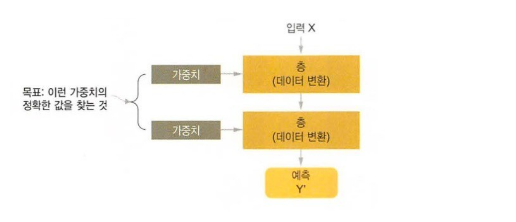

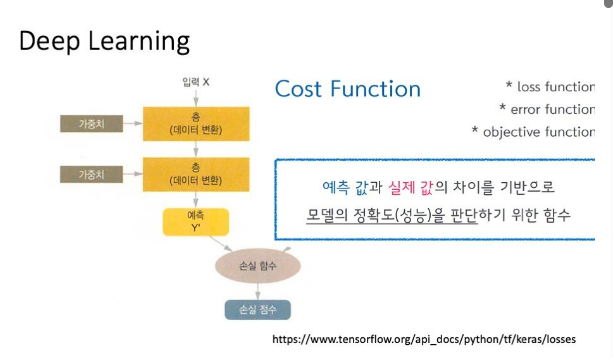

>## 2) 손실함수 

>>### (1) Binary Crossentropy 
- 둘 중 하나 판단할 때

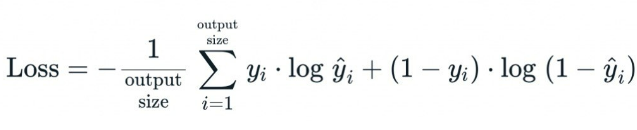

>>### (2) Categorical Crossentropy
- 2개 이상에서 판단할 때

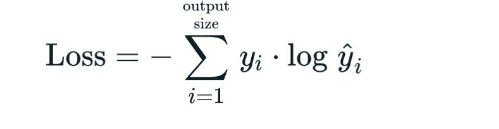

>## 3) 딥러닝 훈련 반복
- 역전파를 통해 손실점수 낮추는 가중치 재설정
- 훈련 반복(Training Loop)를 통해 최선의 모델 찾음
- 옵티마이저 : 가중치적용

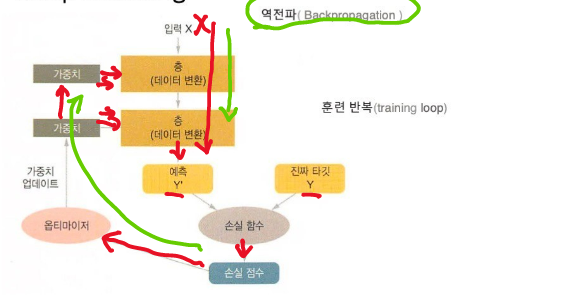

- 주의점 : 훈련반복 너무 많아지면, x에 대해 오버핏됨
- 학습정확도/테스트 정확도 파악 필요

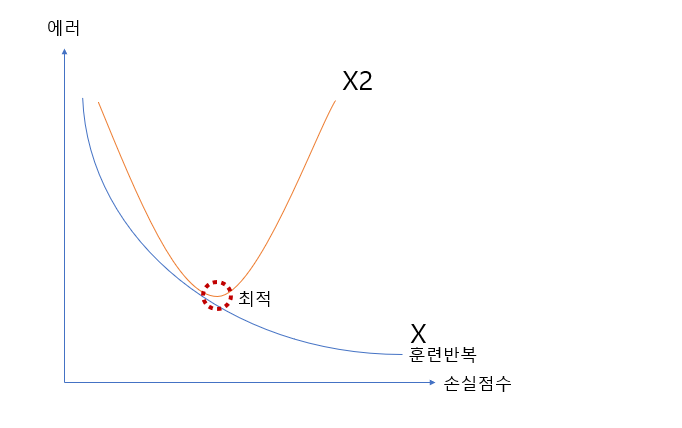

>## 4) Gradient Descent (경사하강법)
- 하나씩 내려가기 보다 지그재그로해서 빠르게 

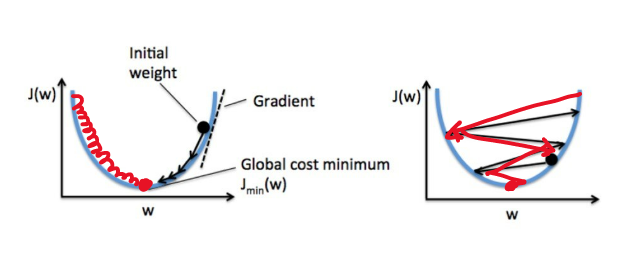

- 물수재비 방식

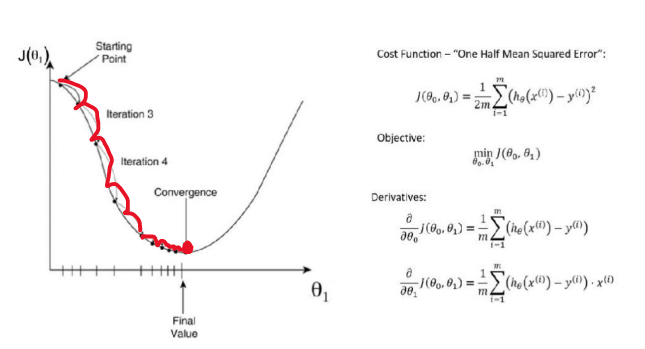

- 모멘텀 (중력 생각하면 쉬움)

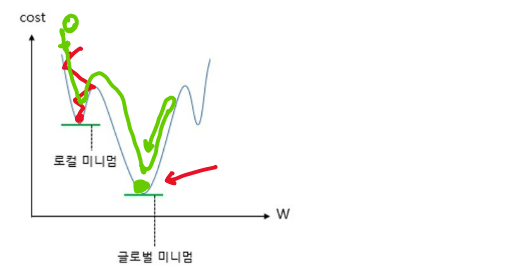

- 쪼개서 접근하기

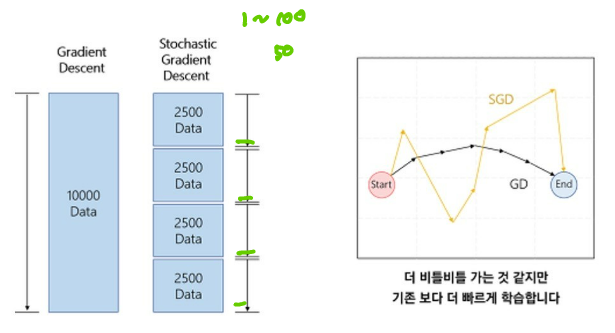

>## 5) Training Model = Optimization problem
- Adam, RMSProp 중에 선택하면 대체로 잘 맞음

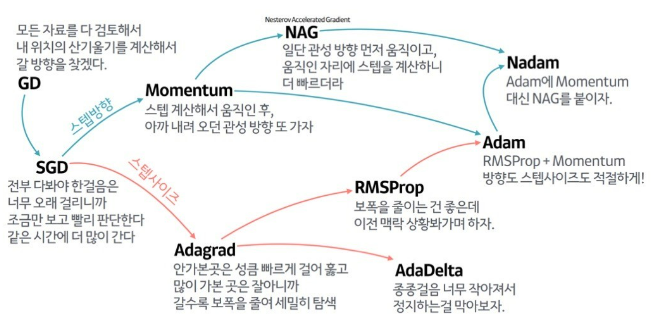

# 3. 실습

>## 1) 기본세팅

>>### (1) Keras 가져오기

In [44]:
import keras
keras.__version__

'2.12.0'

>>### (2) mnist(손글씨 숫자) 데이터 가져와서 훈련/테스트 데이터로

In [45]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

>>### (3) 데이터 확인

In [46]:
#데이터 이미지 모양 확인
train_images.shape

(60000, 28, 28)

In [47]:
#데이터 라벨 모양 확인 
test_images.shape

(10000, 28, 28)

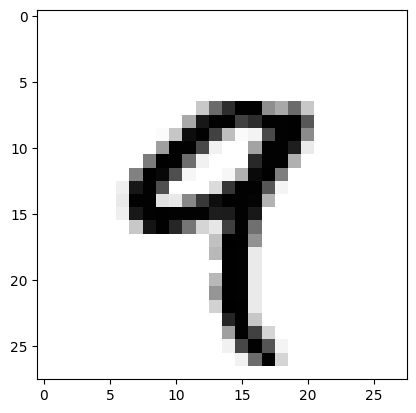

In [48]:
#데이터 확인

import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

>## 2) 신경망 모델

>>### (1) 케라스 딥러닝 모델 가져오기

In [49]:
from keras import models
from keras import layers

>>### (2) 신경망 모델 적용

In [50]:
network = models.Sequential()

network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

>>### (3) 데이터 변경

- 훈련용 데이터 변경

In [51]:
#이미지의 경우 3차원을 2차원으로 표현하면 크기가 작아짐
train_images = train_images.reshape((60000, 28*28))

#타입변경 : 32비트 실수형 타입으로 변경해서 연산속도 빠르게함
train_images = train_images.astype('float32') / 255   

- 테스트용 데이터 변경

In [52]:
#이미지의 경우 3차원을 2차원으로 표현하면 크기가 작아짐
test_images = test_images.reshape((10000, 28*28))

#타입변경 : 32비트 실수형 타입으로 변경해서 연산속도 빠르게함
test_images = test_images.astype('float32') / 255   

- 라벨 데이터 확인

In [53]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

- 라벨데이터 → 카테고리데이터

In [54]:
from tensorflow.keras.utils import to_categorical

In [55]:
#훈련용 라벨 카테고리화 
train_labels = to_categorical(train_labels)

#테스트용 라벨 카테고리화 
test_labels = to_categorical(test_labels)

>>### (4) 신경망의 학습

- 여기서 정확도는 실제정확도가 아닌 학습정확도임

In [56]:
# 훈련용 이미지적용, 라벨적용, 반복횟수설정, 돌리는사이즈결정 
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2646 - accuracy: 0.9227
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1074 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0709 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0512 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0383 - accuracy: 0.9890


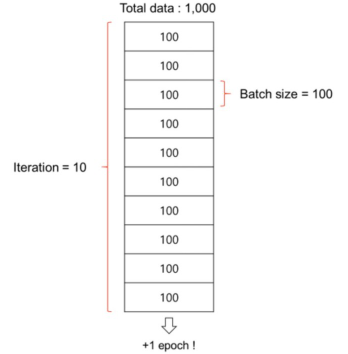

>>### (5) 평가

In [57]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0605 - accuracy: 0.9809
test acc: 0.98089998960495
